# Perbandingan Perilaku Klien antara Paket Surf dan Paket Ultimate dari Megaline

Paket selular yang beragam merupakan akibat dari beragamnya perilaku pengguna layanan selular, sehingga beragam pula revenue yang bisa didapatkan perusahaan dari penjualan paket selular tersebut.

Berikut merupakan analisis yang dapat membantu departemen periklanan mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan dari perusahaan selular Megaline.

Analisis dilakukan berdasarkan sampel klien yang berukuran relatif kecil; 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

## Tujuan

- Menganalisis perilaku klien.
- Menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## Membaca Data dan Mempelajarinya

In [2]:
calls_url = 'https://raw.githubusercontent.com/akbar-am/cell-provider/main/megaline_calls.csv'
internet_url = 'https://raw.githubusercontent.com/akbar-am/cell-provider/main/megaline_internet.csv'
messages_url = 'https://raw.githubusercontent.com/akbar-am/cell-provider/main/megaline_messages.csv'
users_url = 'https://raw.githubusercontent.com/akbar-am/cell-provider/main/megaline_users.csv'
plans_url = 'https://raw.githubusercontent.com/akbar-am/cell-provider/main/megaline_plans.csv'
meg_calls = pd.read_csv(calls_url)
meg_internet = pd.read_csv(internet_url)
meg_messages =  pd.read_csv(messages_url)
meg_users = pd.read_csv(users_url)
meg_plans = pd.read_csv(plans_url)

### Calls Data

In [3]:
meg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- `id` - ID sesi web unik
- `call_date` - tanggal panggilan
- `duration` - durasi panggilan dalam menit
- `user_id` - ID pengguna yang melakukan panggilan

In [4]:
meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
meg_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
len(meg_calls[meg_calls['duration']==0])/len(meg_calls)

0.1948233927469416

In [7]:
meg_calls.duplicated().sum()

0

Data pada `meg_calls` tidak terdapat duplikat dan tidak ada data yang kosong. Namun, ada data pada `call_date` formatnya adalah object dan harus diubah ke format datetime, sedangkan data pada `duration` harus dibulatkan ke atas dan diubah ke tipe data integer.

`meg_calls` memiliki data `duration` bernilai 0 sebesar 19.5% dari keseluruhan data `meg_calls`. Data ini saya anggap tetap wajar dengan asumsi pengguna tidak sengaja memencet tombol panggil dan langsung mematikan panggilan tersebut atau panggilan tersebut merupakan panggilan tak terjawab.

### Internet Data

In [8]:
meg_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


- `id` - ID sesi web unik
- `mb_used` - volume data yang dihabiskan selama sesi (dalam megabita)
- `session_web` - tanggal sesi web
- `user_id` - ID pengguna

In [9]:
meg_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
meg_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [11]:
meg_internet.duplicated().sum()

0

Data pada `meg_internet` tidak terdapat duplikat, tidak ada data yang kosong, dan tidak terdapat data dengan nilai yang tidak wajar. Namun, ada data pada `session_date` formatnya adalah object dan harus diubah ke format datetime, sedangkan data pada `mb_used` harus dibulatkan ke atas dan diubah ke tipe data integer.

### Messages Data

In [12]:
meg_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


- `id` - ID SMS unik
- `messages_date` - tanggal SMS dikirim
- `user_id` - ID pengguna yang mengirim SMS

In [13]:
meg_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
meg_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [15]:
meg_messages.duplicated().sum()

0

Data pada `meg_messages` tidak terdapat duplikat, tidak ada data yang kosong, dan tidak terdapat data dengan nilai yang tidak wajar. Namun, ada data pada `message_date` formatnya adalah object dan harus diubah ke format datetime.

### Users Data

In [16]:
meg_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


- `user_id` - ID pengguna
- `first_name` - nama depan pengguna
- `last_name` - nama belakang pengguna
- `age` - usia pengguna dalam tahun
- `reg_date` - tanggal mulai berlangganan dalam format dd-mm-yy
- `churn_date` - tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` - kota tempat tinggal pengguna
- `plan` - nama paket pengguna

In [17]:
meg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
meg_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [19]:
meg_users.duplicated().sum()

0

Data pada `meg_users` tidak terdapat duplikat, tidak ada data yang kosong, dan tidak terdapat data dengan nilai yang tidak wajar. Namun, ada data pada `reg_date` dan `churn_date` formatnya adalah object dan harus diubah ke format datetime.

### Plans Data

In [20]:
meg_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- `plan_name` - nama paket telepon
- `usd_monthly_fee` - biaya bulanan dalam dolar AS
- `minutes_included` - alokasi menit panggilan bulanan
- `messages_included` - alokasi SMS bulanan
- `mb_per_month_included` - alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` - harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` - harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` - harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

meg_plans.info()

Data pada `meg_plans` tidak ada data yang kosong dan tidak terdapat data dengan nilai yang tidak wajar.

## Menyiapkan Data

- mengubah data menjadi tipe data yang sesuai
- menemukan dan mengeliminasi kesalahan pada data

### Menyiapkan Data pada `meg_calls`

kita akan mengubah format pada `call_date` menjadi datetime.

In [21]:
meg_calls['call_date'] = pd.to_datetime(meg_calls['call_date'])
meg_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Kita akan menambahkan kolom `month` dan `year` pada `meg_calls`.

In [22]:
meg_calls['month'] = meg_calls['call_date'].dt.month.astype('str')
meg_calls['year'] = meg_calls['call_date'].dt.year.astype('str')
meg_calls['year_month'] = meg_calls['year'] + '-' + meg_calls['month']
meg_calls

,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018-12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018-12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018-12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018-12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018-12
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,2018,2018-11
137731,1499_200,1499,2018-10-20,10.89,10,2018,2018-10
137732,1499_201,1499,2018-09-21,8.12,9,2018,2018-9
137733,1499_202,1499,2018-10-10,0.37,10,2018,2018-10


In [23]:
meg_calls['duration_round'] = meg_calls['duration'].apply(np.ceil).astype('int')
meg_calls

,id,user_id,call_date,duration,month,year,year_month,duration_round
0,1000_93,1000,2018-12-27,8.52,12,2018,2018-12,9
1,1000_145,1000,2018-12-27,13.66,12,2018,2018-12,14
2,1000_247,1000,2018-12-27,14.48,12,2018,2018-12,15
3,1000_309,1000,2018-12-28,5.76,12,2018,2018-12,6
4,1000_380,1000,2018-12-30,4.22,12,2018,2018-12,5
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,2018,2018-11,9
137731,1499_200,1499,2018-10-20,10.89,10,2018,2018-10,11
137732,1499_201,1499,2018-09-21,8.12,9,2018,2018-9,9
137733,1499_202,1499,2018-10-10,0.37,10,2018,2018-10,1


In [24]:
meg_calls_agg = meg_calls.groupby(['user_id', 'year_month']).agg({'duration_round':'sum'}).reset_index()
meg_calls_agg

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-10,393
2,1001,2018-11,426
3,1001,2018-12,412
4,1001,2018-8,182
...,...,...,...
2253,1498,2018-9,363
2254,1499,2018-10,385
2255,1499,2018-11,308
2256,1499,2018-12,496


In [25]:
meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   month           137735 non-null  object        
 5   year            137735 non-null  object        
 6   year_month      137735 non-null  object        
 7   duration_round  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 8.4+ MB


Format `call_date` sudah diubah menjadi datetime, dan kolom `month`, `year`, dan `year_month` sudah ditambahkan.

Nilai pada `duration` sudah dibulatkan dan disimpan ke kolom baru bernama `duration_round`.

### Menyiapkan Data pada `meg_internet`

Kita akan mengubah format pada `session_date` menjadi datetime.

In [26]:
meg_internet['session_date'] = pd.to_datetime(meg_internet['session_date'])

In [27]:
meg_internet['month'] = meg_internet['session_date'].dt.month.astype('str')
meg_internet['year'] = meg_internet['session_date'].dt.year.astype('str')
meg_internet['year_month'] = meg_internet['year'] + '-' + meg_internet['month']
meg_internet

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018-12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018-12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018-12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018-12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018-12
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,2018,2018-10
104821,1499_216,1499,2018-12-30,304.72,12,2018,2018-12
104822,1499_217,1499,2018-09-22,292.75,9,2018,2018-9
104823,1499_218,1499,2018-12-07,0.00,12,2018,2018-12


Kita akan membulatkan ke atas penggunaan data internet.

In [28]:
meg_internet['mb_used_round'] = meg_internet['mb_used'].apply(np.ceil).astype('int')
meg_internet

,id,user_id,session_date,mb_used,month,year,year_month,mb_used_round
0,1000_13,1000,2018-12-29,89.86,12,2018,2018-12,90
1,1000_204,1000,2018-12-31,0.00,12,2018,2018-12,0
2,1000_379,1000,2018-12-28,660.40,12,2018,2018-12,661
3,1000_413,1000,2018-12-26,270.99,12,2018,2018-12,271
4,1000_442,1000,2018-12-27,880.22,12,2018,2018-12,881
...,...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,2018,2018-10,219
104821,1499_216,1499,2018-12-30,304.72,12,2018,2018-12,305
104822,1499_217,1499,2018-09-22,292.75,9,2018,2018-9,293
104823,1499_218,1499,2018-12-07,0.00,12,2018,2018-12,0


In [29]:
meg_internet_agg = meg_internet.groupby(['user_id', 'year_month']).agg({'mb_used' : 'sum'}).reset_index()
meg_internet_agg['gb_used'] = meg_internet_agg['mb_used']/1024
meg_internet_agg['gb_used_round'] = meg_internet_agg['gb_used'].apply(np.ceil).astype('int')
meg_internet_agg

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-10,22330.49,21.807119,22
2,1001,2018-11,18504.30,18.070605,19
3,1001,2018-12,19369.18,18.915215,19
4,1001,2018-8,6919.15,6.756982,7
...,...,...,...,...,...
2272,1498,2018-9,22827.28,22.292266,23
2273,1499,2018-10,19492.43,19.035576,20
2274,1499,2018-11,16813.83,16.419756,17
2275,1499,2018-12,22059.21,21.542197,22


In [30]:
meg_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   month          104825 non-null  object        
 5   year           104825 non-null  object        
 6   year_month     104825 non-null  object        
 7   mb_used_round  104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


### Menyiapkan Data pada `meg_messages`

Kita akan mengubah format tanggal pada `message_date`

In [31]:
meg_messages['message_date'] = pd.to_datetime(meg_messages['message_date'])
meg_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [32]:
meg_messages['month'] = meg_messages['message_date'].dt.month.astype('str')
meg_messages['year'] = meg_messages['message_date'].dt.year.astype('str')
meg_messages['year_month'] = meg_messages['year'] + '-' + meg_messages['month']
meg_messages

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018-12
1,1000_160,1000,2018-12-31,12,2018,2018-12
2,1000_223,1000,2018-12-31,12,2018,2018-12
3,1000_251,1000,2018-12-27,12,2018,2018-12
4,1000_255,1000,2018-12-26,12,2018,2018-12
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,2018,2018-12
76047,1497_536,1497,2018-12-24,12,2018,2018-12
76048,1497_547,1497,2018-12-31,12,2018,2018-12
76049,1497_558,1497,2018-12-24,12,2018,2018-12


In [33]:
meg_messages_agg = meg_messages.groupby(['user_id', 'year_month']).agg({'id':'count'}).reset_index().rename(columns={'id':'message_count'})
meg_messages_agg

,user_id,year_month,message_count
0,1000,2018-12,11
1,1001,2018-10,53
2,1001,2018-11,36
3,1001,2018-12,44
4,1001,2018-8,30
...,...,...,...
1801,1496,2018-11,13
1802,1496,2018-12,11
1803,1496,2018-8,2
1804,1496,2018-9,21


### Menyiapkan Data pada `meg_plans`

In [34]:
meg_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Kita akan mengkonversi `mb_per_month_included` ke dalam satuan gigabita.

In [35]:
meg_plans['gb_per_month_included'] = (meg_plans['mb_per_month_included']/1024).astype('int')
meg_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


`mb_per_mont_included` sudah dikonversi ke dalam gigabita dan disimpan dalam `gb_per_month_included`.

### Pendapatan Bulanan dari Setiap Pengguna

Pertama, kita akan menggabungkan dataset `meg_calls_aggg` dan `meg_internet_agg`.

In [36]:
merge_1 = pd.merge(meg_calls_agg, meg_internet_agg, on=['user_id', 'year_month'], how='outer')
merge_1

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round
0,1000,2018-12,124.0,1901.47,1.856904,2.0
1,1001,2018-10,393.0,22330.49,21.807119,22.0
2,1001,2018-11,426.0,18504.30,18.070605,19.0
3,1001,2018-12,412.0,19369.18,18.915215,19.0
4,1001,2018-8,182.0,6919.15,6.756982,7.0
...,...,...,...,...,...,...
2287,1311,2018-6,NaN,1498.83,1.463701,2.0
2288,1349,2018-10,NaN,13093.55,12.786670,13.0
2289,1349,2018-11,NaN,17128.26,16.726816,17.0
2290,1349,2018-12,NaN,13039.91,12.734287,13.0


Kemudian, dari penggabungan yang pertama, kita gabungkan lagi dengan `meg_messages_agg`.

In [37]:
merge_2 = pd.merge(merge_1, meg_messages_agg, on=['user_id', 'year_month'], how='outer')
merge_2

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round,message_count
0,1000,2018-12,124.0,1901.47,1.856904,2.0,11.0
1,1001,2018-10,393.0,22330.49,21.807119,22.0,53.0
2,1001,2018-11,426.0,18504.30,18.070605,19.0,36.0
3,1001,2018-12,412.0,19369.18,18.915215,19.0,44.0
4,1001,2018-8,182.0,6919.15,6.756982,7.0,30.0
...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,13093.55,12.786670,13.0,76.0
2289,1349,2018-11,NaN,17128.26,16.726816,17.0,72.0
2290,1349,2018-12,NaN,13039.91,12.734287,13.0,61.0
2291,1361,2018-5,NaN,1519.69,1.484072,2.0,2.0


In [38]:
merge_2.isna().sum()

user_id             0
year_month          0
duration_round     35
mb_used            16
gb_used            16
gb_used_round      16
message_count     487
dtype: int64

Kekosongan data seperti yang ditunjukkan di atas berarti pengguna tidak menggunakan layanan tersebut. Bisa dilihat `message_count` memiliki jumlah paling banyak, karena pada zaman sekarang jarang sekali orang yang memanfaatkan SMS untuk berkomunikasi.

Kekosongan di atas dapat kita isi dengan fillna(0).

Kita juga dapat menghilangkan kolom `mb_used` dan `gb_used` karena tidak akan digunakan untuk analisis nanti.

In [39]:
merge_2 = merge_2.fillna(0).drop(columns=['mb_used', 'gb_used'])
merge_2

,user_id,year_month,duration_round,gb_used_round,message_count
0,1000,2018-12,124.0,2.0,11.0
1,1001,2018-10,393.0,22.0,53.0
2,1001,2018-11,426.0,19.0,36.0
3,1001,2018-12,412.0,19.0,44.0
4,1001,2018-8,182.0,7.0,30.0
...,...,...,...,...,...
2288,1349,2018-10,0.0,13.0,76.0
2289,1349,2018-11,0.0,17.0,72.0
2290,1349,2018-12,0.0,13.0,61.0
2291,1361,2018-5,0.0,2.0,2.0


In [40]:
merge_2.isna().sum()

user_id           0
year_month        0
duration_round    0
gb_used_round     0
message_count     0
dtype: int64

Sudah tidak ada kolom dengan data yang kosong.

Lalu, kita akan menggabungkan dataset `meg_users` dengan `meg_plans` berdasarkan nama plan yang dipilih.

In [41]:
meg_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [42]:
meg_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Kita juga akan melakukan drop terhadap kolom-kolom yang tidak digunakan untuk analisis nanti, yaitu `first_name`, `last_name`, `age`, `reg_date`, `churn_date`, `mb_per_month_included`.

In [43]:
merge_3 = pd.merge(meg_users, meg_plans, left_on='plan', right_on='plan_name')
merge_3 = merge_3.drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'mb_per_month_included'])
merge_3

,user_id,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
4,1013,"Knoxville, TN MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15
497,1496,"New Orleans-Metairie, LA MSA",surf,50,500,20,10,0.03,0.03,surf,15
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15


Kemudian kita akan menggabungkan `merge_2` dan `merge_3`.

In [44]:
merge_full = pd.merge(merge_2, merge_3, on=['user_id'], how='inner')
merge_full

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
1,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
2,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
3,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
4,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
2289,1204,2018-12,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
2290,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15
2291,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15


In [45]:
merge_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   year_month             2293 non-null   object 
 2   duration_round         2293 non-null   float64
 3   gb_used_round          2293 non-null   float64
 4   message_count          2293 non-null   float64
 5   city                   2293 non-null   object 
 6   plan                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   minutes_included       2293 non-null   int64  
 9   usd_monthly_pay        2293 non-null   int64  
 10  usd_per_gb             2293 non-null   int64  
 11  usd_per_message        2293 non-null   float64
 12  usd_per_minute         2293 non-null   float64
 13  plan_name              2293 non-null   object 
 14  gb_per_month_included  2293 non-null   int64  
dtypes: f

Untuk menghitung biaya tambahan dari penggunaan durasi panggilan berlebih, kita akan menggunakan fungsi sebagai berikut.

In [46]:
def chargeable_calls(row):
    plan = row['plan']
    minutes_used = row['duration_round']

    if plan=='surf':
        if minutes_used > 500:
            chargeable = (minutes_used - 500) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [47]:
merge_full['call_extra_charge'] = merge_full.apply(chargeable_calls, axis=1)
merge_full

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0
1,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0
2,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0
3,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0
4,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0
2289,1204,2018-12,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0
2290,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0
2291,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0


Setelah melakukan apply, biaya panggilan tambahan sudah terhitung dan disimpan dalam kolom `call_extra_charge`.

Kita juga memerlukan fungsi untuk menghitung pemakaian kuota data internet berlebih. Fungsinya adalah sebagai berikut.

In [48]:
def chargeable_data(row):
    plan = row['plan']
    data_used = row['gb_used_round']
    if plan=='surf':
        if data_used>15:
            chargeable = (data_used-15)*10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_used>30:
            chargeable = (data_used-30)*7
        else:
            chargeable = 0
    return chargeable

In [49]:
merge_full['internet_extra_charge'] = merge_full.apply(chargeable_data, axis=1)
merge_full

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0
1,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,70.0
2,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0
3,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0
4,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0
2289,1204,2018-12,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,42.0
2290,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0
2291,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,20.0


Setelah melakukan apply, biaya kuota data internet berlebih sudah terhitung dan disimpan dalam kolom `internet_extra_charge`.

Kita juga memerlukan fungsi untuk menghitung pemakaian kuota SMS berlebih. Fungsinya adalah sebagai berikut.

In [50]:
def chargeable_messages(row):
    plan = row['plan']
    messages_used = row['message_count']
    if plan == 'surf':
        if messages_used>50:
            chargeable = (messages_used-50)*0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if messages_used>1000:
            chargeable = (messages_used-1000)*0.01
        else:
            chargeable = 0
    return chargeable

In [51]:
merge_full['messages_extra_charge'] = merge_full.apply(chargeable_messages, axis=1)
merge_full

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.00
1,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,70.0,0.09
2,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00
3,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00
4,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.00
2289,1204,2018-12,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,42.0,0.00
2290,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.78
2291,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,20.0,0.66


Setelah melakukan apply, biaya kuota SMS berlebih sudah terhitung dan disimpan dalam kolom `messages_extra_charge`.

Sekarang kita sudah siap untuk menghitung pendapatan bulanan Megaline dari pengguna paket Surf dan Ultimate. Kita akan menghitungnya dengan menjumlahkan biaya-biaya pada kolom `usd_monthly_pay`, `call_extra_charge`, `internet_extra_charge`, dan `messages_extra_charge`.

In [52]:
merge_full['monthly_revenue'] = merge_full['usd_monthly_pay'] + merge_full['call_extra_charge'] + merge_full['internet_extra_charge'] + merge_full['messages_extra_charge']
merge_full

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.00,70.00
1,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,70.0,0.09,90.09
2,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
3,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
4,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.00,70.00
2289,1204,2018-12,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,42.0,0.00,112.00
2290,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.78,20.78
2291,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,20.0,0.66,40.66


Pendapatan bulanan sudah terhitung dan disimpan di dalam kolom `monthly_revenue`.

Lalu, kita akan membandingkan pendapatan antara paket Surf dan paket Ultimate.

In [53]:
full_revenue = merge_full['monthly_revenue'].sum()
full_revenue

147557.18

In [54]:
surf_revenue = merge_full[merge_full['plan']=='surf']['monthly_revenue'].sum()
surf_revenue

95491.18

In [55]:
ultimate_revenue = merge_full[merge_full['plan']=='ultimate']['monthly_revenue'].sum()
ultimate_revenue

52066.0

In [56]:
(surf_revenue/full_revenue)*100

64.71469568610623

In [57]:
(ultimate_revenue/full_revenue)*100

35.285304313893775

Ternyata sebanyak kira-kira 64.7% pendapatan berasal dari paket Surf.

## Analisis Data

### Analisis Data Panggilan Paket Surf

In [58]:
df_surf = merge_full[merge_full['plan']=='surf'].reset_index(drop=True)
df_surf.head()

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,70.0,0.09,90.09
1,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
2,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
3,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00
4,1001,2018-9,315.0,14.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00


<Axes: ylabel='duration_round'>

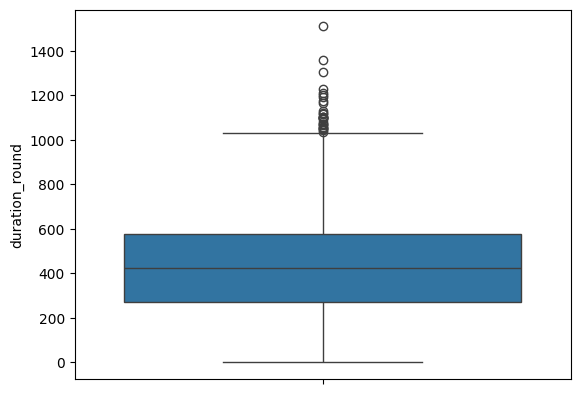

In [59]:
sns.boxplot(df_surf['duration_round'])

<Axes: xlabel='duration_round', ylabel='Density'>

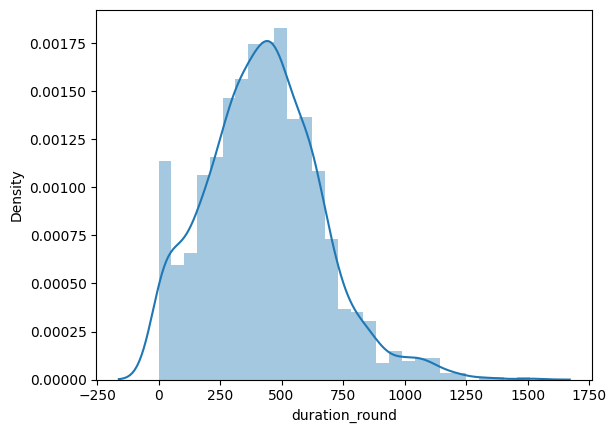

In [60]:
sns.distplot(df_surf['duration_round'])

In [61]:
df_surf['duration_round'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: duration_round, dtype: float64

Berdasarkan visualisasi dan deskripsi data di atas dapat kita lihat bahwa data panggilan memiliki outliers yang melampaui upper whiskers, dan data panggilan juga miring ke kanan. Hal tersebut kemungkinan karena sebagian besar pengguna tidak menggunakan layanan telepon di luar internet, sehingga ketika ada sebagian pengguna yang menggunakan panggilan tersebut dalam durasi yang lama, dapat menimbulkan outiler pada data panggilan.

Berdasarkan deskripsi data di atas dapat kita lihat bahwa nilai minimumnya adalah 0, yang berarti ada pengguna yang tidak menggunakan sama sekali kuota panggilannya atau ada panggilan yang dibuat, tapi tidak terjawab. Sedangkan, nilai maksimumnya adalah 1510; 3 kali lebih besar dibanding kuota durasi panggilan yang diberikan. Mungkin pengguna tersebut pekerja yang sibuk.

In [62]:
np.var(df_surf['duration_round'])

54933.334591317485

### Analisis Data Internet Paket Surf

<Axes: ylabel='gb_used_round'>

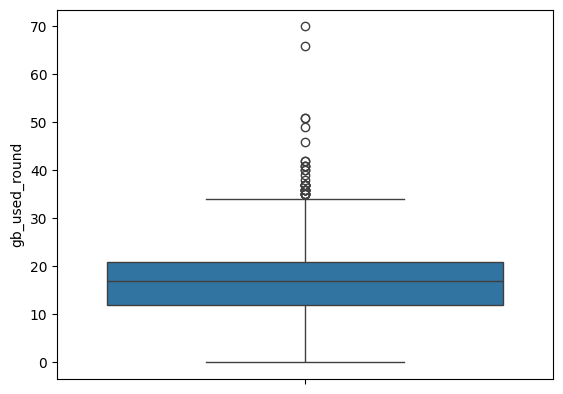

In [63]:
sns.boxplot(df_surf['gb_used_round'])

<Axes: xlabel='gb_used_round', ylabel='Density'>

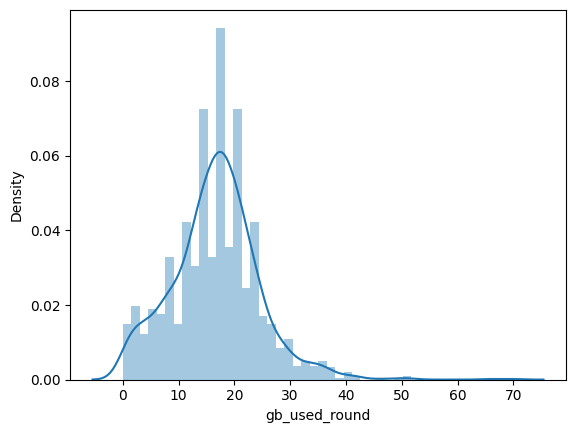

In [64]:
sns.distplot(df_surf['gb_used_round'])

In [65]:
df_surf['gb_used_round'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_round, dtype: float64

Berdasarkan visualisasi dan deskripsi data di atas dapat kita lihat bahwa data internet paket Surf memiliki outliers yang melampaui upper whisker. Beberapa pengguna merupakan pengguna aktif internet dan menghabiskan banyak kuota internet. Penggunaan kuota internet paling rendah adalah 0 GB, kemungkinan pengguna belum sempat memakai kuota internetnya tersebut sejak dia mendaftar paket internet. Rata-rata penggunaan kuota data internet ada di kisaran 16.7 GB dan mediannya adalah 17 GB. Rata-rata dan median tersebut melebihi kuota data internet yang diberikan oleh paket Surf. Mungkin beberapa pengguna perlu mempertimbangkan untuk berpindah ke paket Ultimate.

In [66]:
np.var(df_surf['gb_used_round'])

61.54444942447023

### Analisis Data SMS Paket Surf

<Axes: ylabel='message_count'>

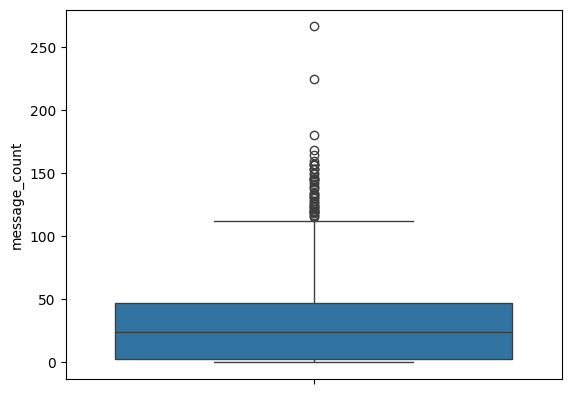

In [67]:
sns.boxplot(df_surf['message_count'])

<Axes: xlabel='message_count', ylabel='Density'>

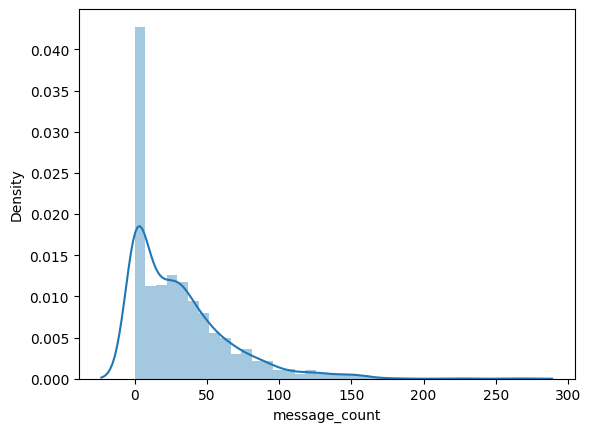

In [68]:
sns.distplot(df_surf['message_count'])

In [69]:
df_surf['message_count'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_count, dtype: float64

In [70]:
np.var(df_surf['message_count'])

1126.008231726662

Berdasarkan visualisasi dan deskripsi data di atas, dapat kita lihat bahwa data SMS pake Surf memiliki outliers yang melampaui upper whisker dan data miring ke kanan, dengan distribusi data terbanyak berada di `message_count` dengan nilai 0. Hal itu berarti sebagian besar pengguna paket Surf tidak memanfaatkan layanan SMS. Namun, ada pengguna yang memanfaatkannnya hingga muncul nilai maksimum 262 SMS.

### Analisis Data Panggilan Paket Ultimate

In [71]:
df_ultimate = merge_full[merge_full['plan']=='ultimate'].reset_index(drop=True)
df_ultimate

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
1,1006,2018-11,10.0,3.0,15.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
2,1006,2018-12,59.0,32.0,139.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,14.0,0.0,84.0
3,1008,2018-10,476.0,17.0,21.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
4,1008,2018-11,446.0,24.0,37.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1493,2018-9,529.0,15.0,0.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
716,1497,2018-12,300.0,11.0,50.0,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
717,1108,2018-12,0.0,1.0,0.0,"Salt Lake City, UT MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
718,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0


<Axes: ylabel='duration_round'>

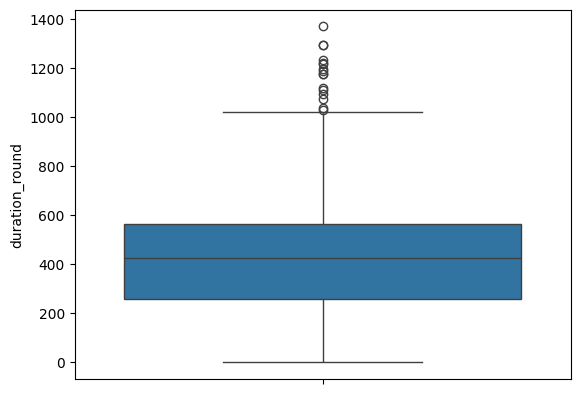

In [72]:
sns.boxplot(df_ultimate['duration_round'])

<Axes: xlabel='duration_round', ylabel='Density'>

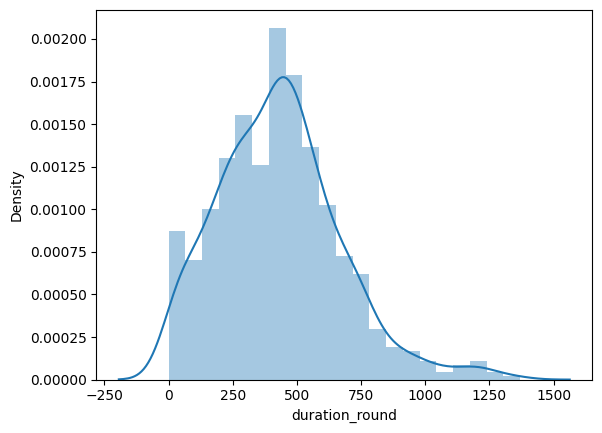

In [73]:
sns.distplot(df_ultimate['duration_round'])

In [74]:
df_ultimate['duration_round'].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: duration_round, dtype: float64

Berdasarkan visualisasi dan deskripsi data di atas dapat kita lihat bahwa data panggilan memiliki outliers yang melampaui upper whisker, dan data panggilan juga miring ke kanan. Hal tersebut kemungkinan karena sebagian besar pengguna tidak menggunakan layanan telepon di luar internet, sehingga ketika ada sebagian pengguna yang menggunakan panggilan tersebut dalam durasi yang lama, dapat menimbulkan outiler pada data panggilan.

Berdasarkan deskripsi data di atas dapat kita lihat bahwa nilai minimumnya adalah 0, yang berarti ada pengguna yang tidak menggunakan sama sekali kuota panggilannya atau ada panggilan yang dibuat, tapi tidak terjawab. Sedangkan nilai maksimumnya adalah 1369; lebih besar dibanding kuota durasi panggilan yang diberikan.

Kita memiliki nilai rata-rata 430 yang tidak berbeda jauh dari rata-rata paket Surf, yaitu 428.

### Analisis Data Internet Paket Ultimate

<Axes: ylabel='gb_used_round'>

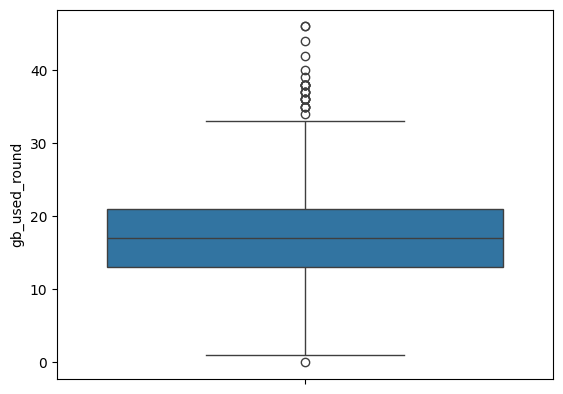

In [75]:
sns.boxplot(df_ultimate['gb_used_round'])

<Axes: xlabel='gb_used_round', ylabel='Density'>

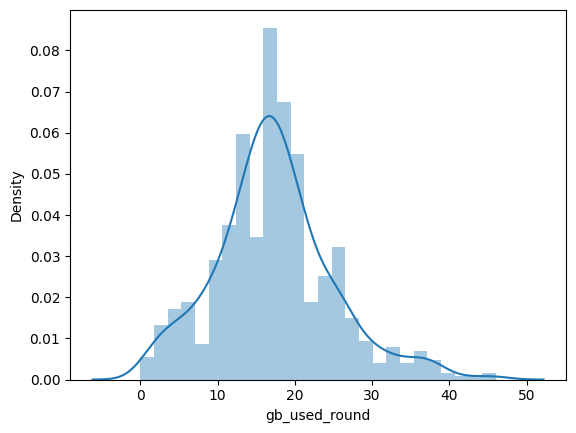

In [76]:
sns.distplot(df_ultimate['gb_used_round'])

In [77]:
df_ultimate['gb_used_round'].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_round, dtype: float64

Berdasarkan visualisasi di atas dapat dilihat bahwa data memiliki outliers yang melampaui upper whiskers dan data miring ke kanan. Hal itu disebabkan oleh para pengguna yang menggunakan koneksi internet sangat banyak hingga muncul nilai maximum 46.

Namun, ternyata ada pula pengguna yang tidak memanfaatkan kuota data internetnya, sehingga terdapat nilai minimum 0.

Rata-rata penggunaan kuota data internet adalah 17.3 GB, tidak berbeda jauh dibanding rata-rata penggunaan kouta data internet pengguna paket Surf, tapi pengguna paket Ultimate tidak perlu mengeluarkan biaya tambahan dengan jumlah penggunaan kuota data internet tersebut.

Rata-rata pada paket Ultimate juga tidak jauh berbeda dengan rata-rata pada paket Ultimate, yaitu 16.67.

### Analisis Data SMS Paket Ultimate

<Axes: ylabel='message_count'>

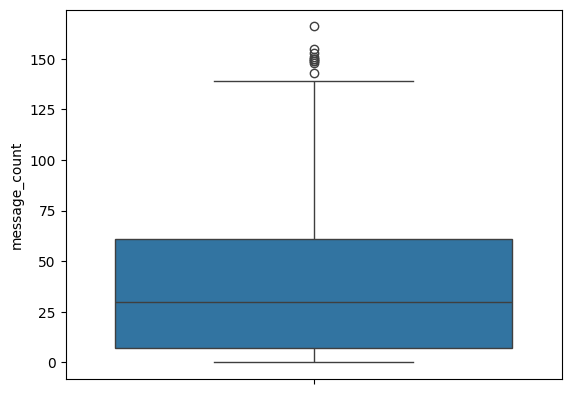

In [78]:
sns.boxplot(df_ultimate['message_count'])

<Axes: xlabel='message_count', ylabel='Density'>

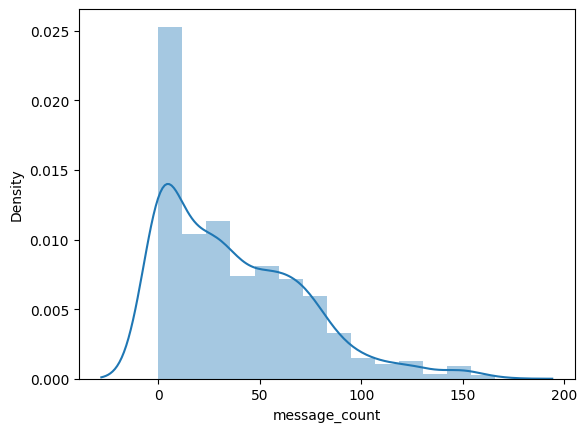

In [79]:
sns.distplot(df_ultimate['message_count'])

In [80]:
df_ultimate['message_count'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_count, dtype: float64

Berdasarkan visualisasi dan deskripsi data di atas, dapat kita lihat bahwa data SMS paket Ultimate memiliki outliers yang melampaui upper whisker dan data miring ke kanan, dengan distribusi data terbanyak berada di `message_count` dengan nilai 0. Hal itu berarti sebagian besar pengguna paket Ultimate tidak memanfaatkan layanan SMS. Namun, ada pengguna yang memanfaatkannnya hingga muncul nilai maksimum 166 SMS.

Namun, pengguna tersebut tidak perlu mengeluarkan biaya tambahan untuk SMS tersebut, karena tidak melebih kuota SMS paket Ultimate.

Kita memiliki nilai rata-rata 37.5, tidak jauh berbeda dengan rata-rata pada paket Surf, yaitu 31.2.

## Menguji Hipotesis

### Rata-Rata Pendapatan dari Pengguna Paket Surf dan Ultimate Berbeda

- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna paket surf dan paket ultimate sama.
- H1 (Alternative Hypothesis) = Rata-rata pendpatan dari pengguna paket surf dan paket ultimate berbeda.

In [81]:
df_surf.shape, df_ultimate.shape

((1573, 19), (720, 19))

In [82]:
np.var(df_surf['monthly_revenue']), np.var(df_ultimate['monthly_revenue'])

(3065.8848438690247, 129.66814043209877)

In [83]:
(np.var(df_surf['monthly_revenue'])-np.var(df_ultimate['monthly_revenue']))/np.var(df_surf['monthly_revenue']) * 100

95.77061282352462

Varians antara data pendapatan paket Surf dan data pendapatan paket Ultimate berbeda cukup jauh, yaitu kira-kira 96%, maka dianggap dua nilai varians tersebut tidak equal.

In [84]:
alpha = 0.05
results = st.ttest_ind(df_surf['monthly_revenue'], df_ultimate['monthly_revenue'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue<alpha:
    print('Kita menolak H0 (Null Hypothesis)')
else:
    print('Kita tidak bisa menolak H0 (Null Hypothesis)')

p-value: 3.1703905481135734e-15
Kita menolak H0 (Null Hypothesis)


Berdasarkan perhitungan di atas dapat kita lihat bahwa H0 ditolak, sehingga dianggap bahwa antara pendapatan dari pengguna paket Surf dan pendapatan dari pengguna paket Ultimate itu tidak sama.

### Rata-Rata Pendapatan dari Pengguna Paket Surf di NY-NJ Berbeda dengan Pendapatan di Daerah Lain

- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna paket Surf di daerah NY-NJ dan paket surf di daerah lain sama.
- H1 (Alternative Hypothesis) = Rata-rata pendpatan dari pengguna paket Surf di daerah NY-NJ dan paket surf di daerah lain berbeda.

Kita akan memfilter dataset berdasarkan `city` sama dengan `NY-NJ` dan menyimpannya ke dataset baru, maka kita akan mencari tahu string unik pada kolom `city` yang memuat `NY-NJ`.

In [85]:
sorted(df_surf['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jacksonville, FL MSA',
 'Kansas City, MO-KS MSA',
 'Knoxville, TN MSA',
 'Las Veg

String unik yang memuat `NY-NJ` ada satu, yaitu `New York-Newark-Jersey City, NY-NJ-PA MSA`.

In [86]:
df_surf_ny_nj = df_surf[df_surf['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop=True)
df_surf_ny_nj

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1014,2018-11,163.0,2.0,9.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,0.0,0.00,20.00
1,1014,2018-12,1114.0,8.0,64.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,18.42,0.0,0.42,38.84
2,1022,2018-10,574.0,19.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,2.22,40.0,0.00,62.22
3,1022,2018-11,498.0,22.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,70.0,0.00,90.00
4,1022,2018-12,585.0,18.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,2.55,30.0,0.00,52.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1080,2018-10,0.0,30.0,59.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,150.0,0.27,170.27
308,1080,2018-11,0.0,33.0,50.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,180.0,0.00,200.00
309,1080,2018-12,0.0,24.0,61.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,90.0,0.33,110.33
310,1080,2018-8,0.0,21.0,31.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.00,60.0,0.00,80.00


Lalu, kita akan memfilter dataset dengan `city` selain string yang mengandung `NY-NJ` dan menyimpannya ke dataset baru, maka kita akan menggunakan logika `!=`.

In [87]:
df_surf_other = df_surf[df_surf['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop=True)
df_surf_other

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1001,2018-10,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,70.0,0.09,90.09
1,1001,2018-11,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
2,1001,2018-12,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,40.0,0.00,60.00
3,1001,2018-8,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00
4,1001,2018-9,315.0,14.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1194,2018-8,0.0,6.0,10.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.00,20.00
1257,1194,2018-9,0.0,37.0,76.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,220.0,0.78,240.78
1258,1349,2018-10,0.0,13.0,76.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.0,0.78,20.78
1259,1349,2018-11,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,20.0,0.66,40.66


In [88]:
np.var(df_surf_ny_nj['monthly_revenue']), np.var(df_surf_other['monthly_revenue'])

(2185.486530275107, 3278.9803386080685)

In [89]:
(np.var(df_surf_other['monthly_revenue']) - np.var(df_surf_ny_nj['monthly_revenue']))/np.var(df_surf_other['monthly_revenue']) *100

33.34859302014452

Dari perhitungan di atas dapat dilihat bahwa niliai varians antara `df_surf_other` dan `df_surf_ny_nj` berbeda cukup banyak, yaitu 33.3%, maka kita simpulkan bahwa nilai dua varians tersebut tidaklah equal dan kita akan mengatur nilai parameter `equal_var`menjadi False.

In [90]:
alpha = 0.05
results = st.ttest_ind(df_surf_ny_nj['monthly_revenue'], df_surf_other['monthly_revenue'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue<alpha:
    print('Kita menolak H0 (Null Hypothesis)')
else:
    print('Kita tidak bisa menolak H0 (Null Hypothesis)')

p-value: 0.11593195869050489
Kita tidak bisa menolak H0 (Null Hypothesis)


Dari perhitungan di atas didapatkan bahwa kita tidak bisa menolak hipotesis bahwa pendapatan dari pengguna paket Surf antara daerah `NY-NJ` dan daerah lain sama.

### Rata-Rata Pendapatan dari Pengguna Paket Ultimate di NY-NJ Berbeda dengan Pendapatan di Daerah Lain

- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna paket Ultimate di daerah NY-NJ dan paket surf di daerah lain sama.
- H1 (Alternative Hypothesis) = Rata-rata pendpatan dari pengguna paket Ultimate di daerah NY-NJ dan paket surf di daerah lain berbeda.

Kita akan memfilter kolom `city` berdasarkan string unik `NY-NJ` yang kita terapkan pada paket Surf di atas dan menyimpannya ke dataset baru.

In [91]:
df_ultimate_ny_nj = df_ultimate[df_ultimate['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop=True)
df_ultimate_ny_nj

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1031,2018-10,563.0,19.0,2.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
1,1031,2018-11,611.0,16.0,1.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
2,1031,2018-12,471.0,13.0,5.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
3,1031,2018-7,304.0,11.0,1.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
4,1031,2018-8,483.0,22.0,2.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1407,2018-12,200.0,19.0,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
61,1442,2018-12,236.0,15.0,65.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
62,1482,2018-11,785.0,20.0,87.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
63,1482,2018-12,56.0,1.0,5.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0


Kemudian, kita akan memfilter dataset dengan logika `!=` untuk mendapatkan dataset dengan nilai kolom `city` selain `NY-NJ`.

In [92]:
df_ultimate_other = df_ultimate[df_ultimate['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop=True)
df_ultimate_other

,user_id,year_month,duration_round,gb_used_round,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_extra_charge,internet_extra_charge,messages_extra_charge,monthly_revenue
0,1000,2018-12,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
1,1006,2018-11,10.0,3.0,15.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
2,1006,2018-12,59.0,32.0,139.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,14.0,0.0,84.0
3,1008,2018-10,476.0,17.0,21.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
4,1008,2018-11,446.0,24.0,37.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1493,2018-9,529.0,15.0,0.0,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
651,1497,2018-12,300.0,11.0,50.0,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
652,1108,2018-12,0.0,1.0,0.0,"Salt Lake City, UT MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
653,1204,2018-11,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0


In [93]:
np.var(df_ultimate_ny_nj['monthly_revenue']), np.var(df_ultimate_other['monthly_revenue'])

(201.61325443786978, 121.76829788473869)

In [94]:
(np.var(df_ultimate_ny_nj['monthly_revenue']) - np.var(df_ultimate_other['monthly_revenue'])) / np.var(df_ultimate_ny_nj['monthly_revenue']) *100

39.60302946140703

Dari perhitungan di atas dapat dilihat bahwa niliai varians antara `df_ultimate_other` dan `df_ultimate_ny_nj` berbeda cukup banyak, yaitu 39.6%, maka kita simpulkan bahwa nilai dua varians tersebut tidaklah equal dan kita akan mengatur nilai parameter `equal_var`menjadi False.

In [95]:
alpha = 0.05
results = st.ttest_ind(df_ultimate_ny_nj['monthly_revenue'], df_ultimate_other['monthly_revenue'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue<alpha:
    print('Kita menolak H0 (Null Hypothesis)')
else:
    print('Kita tidak bisa menolak H0 (Null Hypothesis)')

p-value: 0.11651840138106019
Kita tidak bisa menolak H0 (Null Hypothesis)


Dari perhitungan di atas disimpulkan bahwa kita tidak dapat menolak hiptesis bahwa pendapatan dari pengguna paket Ultimate antara daerah `NY-NJ` dan daerah lain sama.

## Kesimpulan

### Insights and Findings

Kita menggunakan lima dataset yang terdiri dari dataset panggilan, internet, SMS, users, dan plans. Kelima dataset tersebut kemudian digabungkan dengan metode merge dan `user_id` sebagai primary key-nya.

Dataset yang kita miliki tidak ditemukan adanya duplikat dan data-data yang hilang dianggap bukan masalah, melainkan merupakan data-data yang seharusnya diisi dengan 0, sehingga dianggap bukan data yang hilang.

Berdasarkan perhitungan yang telah dilakukan di `4.5`, ditemukan bahwa paket Surf menyumbang kira-kira 64.7% dari total pendapatan dan pada perhitungan di `6.1` terbukti bahwa pendapatan antara paket Surf dan Ultimate memang berbeda.Hal itu karena masing-masing paket memiliki tarif dasar yang berbeda, tarif biaya tambahan yang berbeda, dan kuota internet, kuota SMS, dan kuota panggilan yang berbeda, tetapi penggunaan kuota-kuota tersebut cenderung sama antara pengguna paket Surf dan paket Ultimate.

Kita juga telah melakukan perhitungan apakah rata-rata pendapatan antara daerah `NY-NJ` dan daerah lain berbeda, dan kita mendapatkan hasil bahwa Null Hypothesis (H0) tidak dapat ditolak, yang berarti pendapatan antara daerah `NY-NJ` dan daerah lain adalah sama.

### Saran

Departemen periklanan Megaline dapat mengarahkan lebih banyak calon pengguna untuk memilih paket Surf, karena paket Surf menyumbang pendapatan sebesar 64.7% dari total pendapatan.